# Load Dataset

Membaca file dataset dan menampilkan data awal.

In [1]:
import pandas as pd

# Load dataset
file_path = "dataset.xlsx"
dataset = pd.read_excel(file_path)

# Menampilkan beberapa baris pertama dataset
print("Data Awal:")
dataset.head()

Data Awal:


,,Nama Sekolah,NPSN,BP,Status,Last Sync,Jml Sync,PD,Rombel,Guru,Pegawai,R. Kelas,R. Lab,R. Perpus
0,1,SMA DON BOSKO,20331899.0,SMA,Swasta,09 Aug 2024 07:54:19,14,611.0,18,29,12,18,5,2
1,2,SMA MARIA REGINA,69886194.0,SMA,Swasta,23 Jul 2024 07:32:01,5,55.0,3,17,1,6,3,1
2,3,SMA TEUKU UMAR,20331914.0,SMA,Swasta,01 Aug 2024 07:42:44,24,480.0,14,25,12,14,5,1
3,4,SMA WIDYA MANDALA,20331917.0,SMA,Swasta,21 Jul 2024 18:00:36,28,26.0,3,1,3,3,1,1
4,5,SMA AGUS SALIM,20331893.0,SMA,Swasta,06 Aug 2024 13:10:21,14,78.0,3,6,3,3,2,1


# Pilih Kolom dan Bersihkan Data

Memilih kolom PD dan Rombel yang akan di analisis, lalu menghapus baris yang tidak relevan seperti total (baris terakhir) dan sekolah dengan jumlah siswa kurang dari 20.

In [2]:
# Pilih kolom yang relevan dan hapus baris terakhir (total keseluruhan)
selected_data = dataset[['PD', 'Rombel']].dropna()
filtered_data = selected_data.iloc[:-1]  # Menghapus baris terakhir (total)

# Hapus baris dengan jumlah siswa < 20
filtered_data = filtered_data[filtered_data['PD'] >= 20]

# Tampilkan data setelah penyaringan
print("Data Setelah Penyaringan:")
filtered_data.head()

Data Setelah Penyaringan:


,PD,Rombel
0,611.0,18
1,55.0,3
2,480.0,14
3,26.0,3
4,78.0,3


# Visualisasi Awal Data

Scatter plot untuk melihat distribusi data setelah penyaringan.

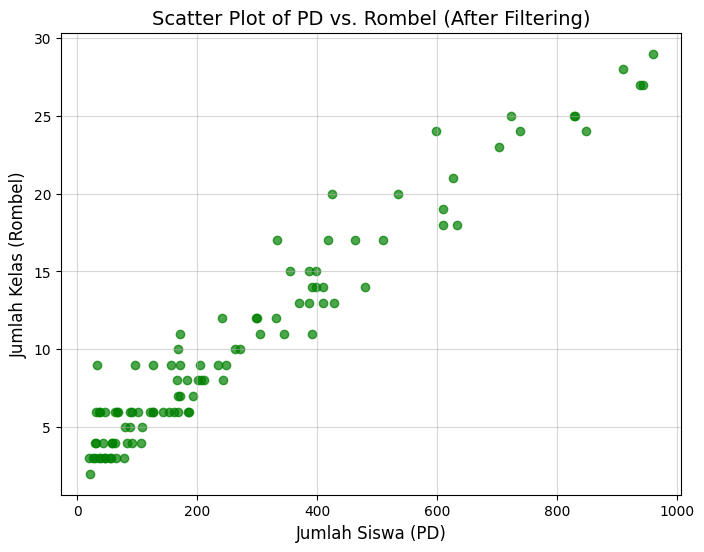

In [3]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['PD'], filtered_data['Rombel'], alpha=0.7, color='green')
plt.title('Scatter Plot of PD vs. Rombel (After Filtering)', fontsize=14)
plt.xlabel('Jumlah Siswa (PD)', fontsize=12)
plt.ylabel('Jumlah Kelas (Rombel)', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

# Standarisasi Data

Data distandarisasi agar semua variabel berada pada skala yang sama, menggunakan StandardScaler.

In [4]:
from sklearn.preprocessing import StandardScaler

# Standarisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)

print("Data Setelah Standarisasi:")
print(scaled_data[:5])  # Menampilkan 5 baris pertama data yang sudah distandarisasi

Data Setelah Standarisasi:
[[ 1.3693327   1.08194776]
 [-0.88117512 -1.08054809]
 [ 0.83908715  0.5052822 ]
 [-0.99855773 -1.08054809]
 [-0.78807858 -1.08054809]]


# Tentukan Jumlah Klaster Optimal

Menggunakan metode Elbow dan Silhouette untuk menentukan jumlah klaster terbaik.

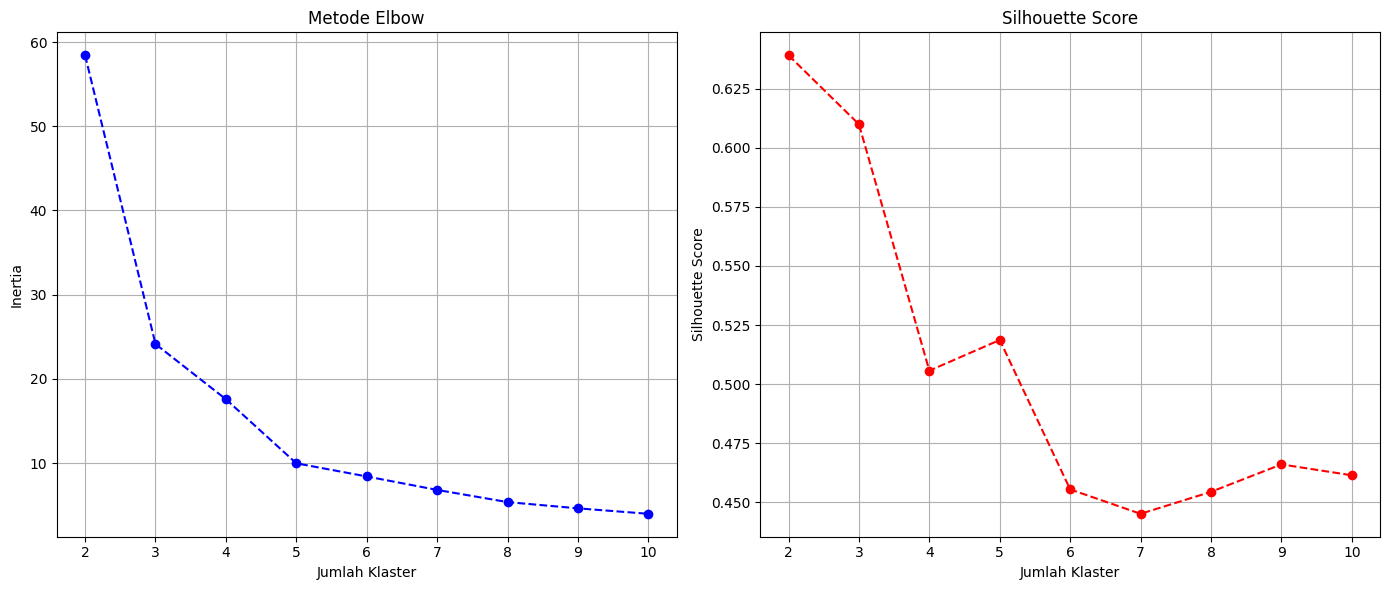

Jumlah klaster optimal berdasarkan Silhouette Score: 2


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Evaluasi jumlah klaster
inertia = []
silhouette_scores = []
range_clusters = range(2, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plot Elbow dan Silhouette
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Elbow Method
ax[0].plot(range_clusters, inertia, marker='o', linestyle='--', color='b')
ax[0].set_title('Metode Elbow')
ax[0].set_xlabel('Jumlah Klaster')
ax[0].set_ylabel('Inertia')
ax[0].grid()

# Silhouette Score
ax[1].plot(range_clusters, silhouette_scores, marker='o', linestyle='--', color='r')
ax[1].set_title('Silhouette Score')
ax[1].set_xlabel('Jumlah Klaster')
ax[1].set_ylabel('Silhouette Score')
ax[1].grid()

plt.tight_layout()
plt.show()

# Tentukan jumlah klaster optimal
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Jumlah klaster optimal berdasarkan Silhouette Score: {optimal_clusters}")

# Terapkan K-Means dengan Jumlah Klaster Optimal

Meneerapkan K-Means pada data yang distandarisasi dengan jumlah klaster optimal.

In [6]:
# K-Means dengan jumlah klaster optimal
final_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
filtered_data['Cluster'] = final_kmeans.fit_predict(scaled_data)

# Menampilkan beberapa baris pertama data dengan klaster
print("Data dengan Klaster:")
filtered_data.head()

Data dengan Klaster:


,PD,Rombel,Cluster
0,611.0,18,1
1,55.0,3,0
2,480.0,14,1
3,26.0,3,0
4,78.0,3,0


# Visualisasi Hasil Klasterisasi

Scatter plot hasil klasterisasi, diwarnai berdasarkan klaster.

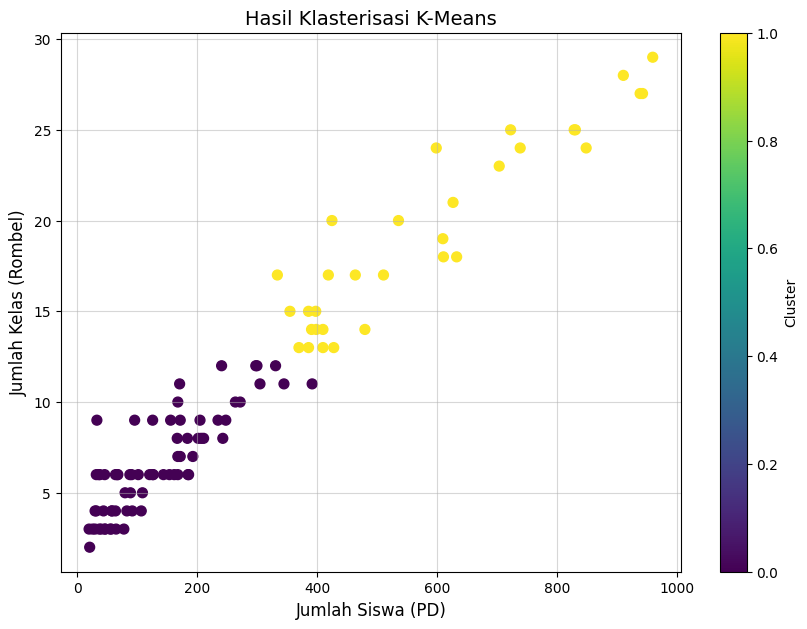

In [7]:
# Visualisasi hasil klasterisasi
plt.figure(figsize=(10, 7))
plt.scatter(filtered_data['PD'], filtered_data['Rombel'], c=filtered_data['Cluster'], cmap='viridis', s=50)
plt.title('Hasil Klasterisasi K-Means', fontsize=14)
plt.xlabel('Jumlah Siswa (PD)', fontsize=12)
plt.ylabel('Jumlah Kelas (Rombel)', fontsize=12)
plt.colorbar(label='Cluster')
plt.grid(alpha=0.5)
plt.show()

# Interpretasi Klaster

Menghitung statistik deskriptif setiap klaster untuk memahami karakteristik masing-masing klaster.

In [8]:
# Statistik deskriptif per klaster
cluster_summary = filtered_data.groupby('Cluster').agg({
    'PD': ['mean', 'min', 'max', 'count'],
    'Rombel': ['mean', 'min', 'max']
}).round(2)

print("Ringkasan Statistik Tiap Klaster:")
print(cluster_summary)

Ringkasan Statistik Tiap Klaster:
             PD                     Rombel        
           mean    min    max count   mean min max
Cluster                                           
0        133.49   20.0  392.0    71   6.52   2  12
1        581.56  334.0  960.0    32  19.31  13  29


# Menggabungkan Kolom Hasil Klaster Kedalam Dataset Asli

In [9]:
# Menggabungkan kolom klaster ke dalam dataset asli
dataset['Klaster'] = filtered_data['Cluster']

# Hapus baris terakhir yang berisi total keseluruhan
dataset = dataset[dataset['Nama Sekolah'] != 'Total']

# Hapus baris dengan jumlah siswa (PD) < 20
dataset = dataset[dataset['PD'] >= 20]

# Menyimpan dataframe final dengan nama sekolah dan klaster ke dalam file CSV
dataset.to_csv('dataset_klaster_final.csv', index=False)

# Menampilkan pesan bahwa file telah disimpan
print("Dataframe telah disimpan sebagai 'dataset_klaster_final.csv'.")

Dataframe telah disimpan sebagai 'dataset_klaster_final.csv'.
